In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Section1: Load data

## 1.1 Load user csv file

In [2]:
# import user csv files
import chardet
with open("takehome_users.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [3]:
# read csv file
user_df = pd.read_csv("takehome_users.csv", encoding='ISO-8859-1')

In [4]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
user_df.shape

(12000, 10)

In [6]:
user_df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
user_df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

## 1.2 Load user engagement table

In [9]:
# import user engagement csv files
user_eng_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [10]:
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
user_eng_df.shape

(207917, 3)

In [12]:
user_eng_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [13]:
# check the data types of each column
user_eng_df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

## 1.3 Sort the user engagment table to find the frequency of user log-in in a week time frame

In [14]:
# set time_stamp as index
user_eng_df['wk'] = user_eng_df['time_stamp'].dt.week
user_eng_df_group = user_eng_df.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name='freq')

In [15]:
user_eng_df_group.head()

,wk,user_id,freq
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [16]:
result = user_eng_df_group[user_eng_df_group.freq >= 3]

# only user ids matching criteria
user_ids = result.user_id.tolist()
user_ids_uniq = pd.Series(user_ids).unique()
print(user_ids_uniq)

[   10    42    63 ...  4134 10446 10335]


In [17]:
# Create a list with 1 represent adapoted user, 0 means not.
adopted_user_temp = np.zeros(len(user_df), dtype=int)
for i in range(len(user_df)):
    for j in user_ids_uniq:
        if user_df['object_id'][i] == j:
            adopted_user_temp[i] = 1   

In [18]:
# Add a target column as adopted_user to user_df table
user_df['adopted_user'] = adopted_user_temp

In [19]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [20]:
# Write out the new table to csv file to save the previous processing time
user_df.to_csv('users_new', index=False)

## 1.4  Feature Engineering

In [21]:
# Read the new Data
df = pd.read_csv('users_new')

In [22]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [23]:
# One-Hot encode of the creation_source column
one_hot = pd.get_dummies(user_df['creation_source'])
# Drop column as it is now encoded
df = df.drop('creation_source', axis=1)
# Join the encoded df
df = df.join(one_hot)
df

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1.378448e+09,0,0,89,8263.0,0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,1.358275e+09,0,0,200,NaN,0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,1.398603e+09,1,1,83,8074.0,0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,1.338638e+09,0,0,6,NaN,0,0,0,1,0,0


In [24]:
# Drop some features for modeling
drop_cols = ['object_id', 'creation_time','name','email','last_session_creation_time','org_id','invited_by_user_id']
df = df.drop(drop_cols, axis=1)

In [25]:
df.sum()

opted_in_to_mailing_list      2994
enabled_for_marketing_drip    1792
adopted_user                  1445
GUEST_INVITE                  2163
ORG_INVITE                    4254
PERSONAL_PROJECTS             2111
SIGNUP                        2087
SIGNUP_GOOGLE_AUTH            1385
dtype: int64

In [26]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [27]:
# Check if null value existed
df.isnull().sum()

opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
adopted_user                  0
GUEST_INVITE                  0
ORG_INVITE                    0
PERSONAL_PROJECTS             0
SIGNUP                        0
SIGNUP_GOOGLE_AUTH            0
dtype: int64

# Section 2 EDA

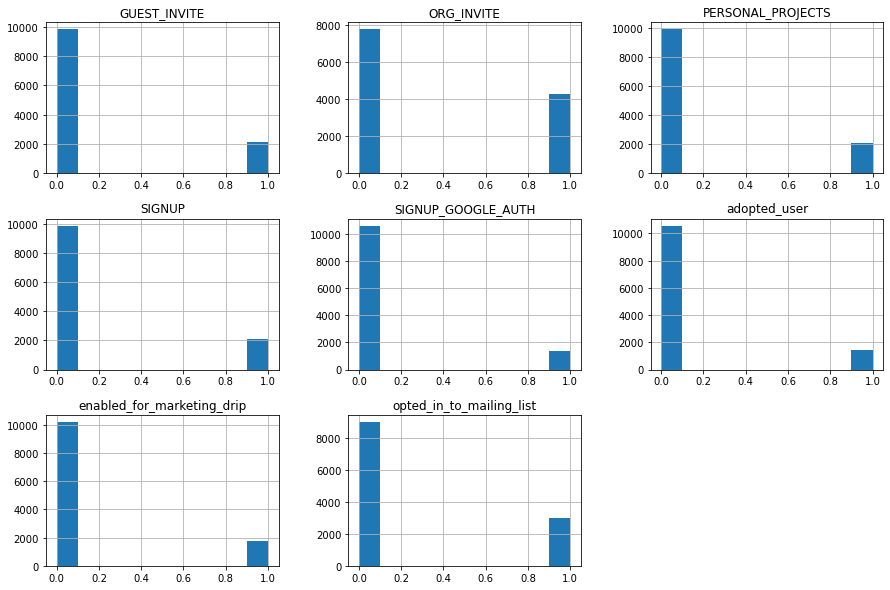

In [28]:
df.hist(figsize=(15,10))
plt.show()

# Section 3 Modeling

In [29]:
## Section 3.1 Logistic Regression

In [30]:
# Prepare data for modeling
X = df.drop('adopted_user', axis=1)
y = df.adopted_user

In [31]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

## 3.1 Decision Tree

In [43]:
# Build decision tree model
dtmodel = DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Call fit() on dtmodel
dt_result = dtmodel.fit(X_train, y_train)

# Predict
y_test_pred_dt = dtmodel.predict(X_test)

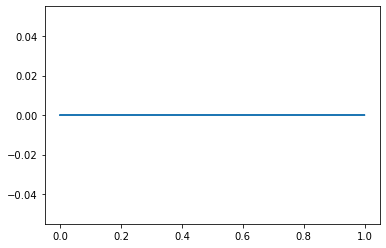

In [44]:
plt.plot(y_test, y_test_pred_dt)
plt.show()

In [45]:
print("The accuracy score is {}".format(accuracy_score(y_test, y_test_pred_dt)))
print("The confusion matrix is \n{}".format(confusion_matrix(y_test,y_test_pred_dt)))

The accuracy score is 0.8766666666666667
The confusion matrix is 
[[3156    0]
 [ 444    0]]


In [46]:
X_train_pred_dt = dt_result.predict(X_train)

In [47]:
print("The confusion matrix is \n{}".format(confusion_matrix(y_train,X_train_pred_dt)))

The confusion matrix is 
[[7399    0]
 [1001    0]]


## 3.2 Random forest model

In [48]:
# Build random forest model
rf_model = RandomForestClassifier()
rf_result = rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_result.predict(X_test)

### Model evaluation

In [49]:
print("The accuracy score is {}".format(accuracy_score(y_test, y_test_pred_rf)))
print("The confusion matrix is \n{}".format(confusion_matrix(y_test,y_test_pred_rf)))

The accuracy score is 0.8766666666666667
The confusion matrix is 
[[3156    0]
 [ 444    0]]
